#**RED WINE QUALITY**
[Dataset_link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
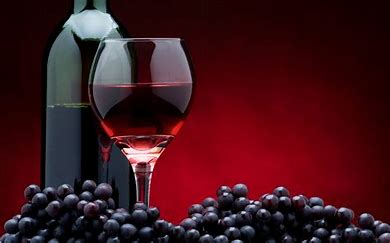

In [ ]:
# Load the Library for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Library for Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the Library for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Load the Library for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# load the dataset - Red Wine Quality
from sklearn.datasets import load_wine
wine = load_wine()
type(wine)
#

sklearn.utils._bunch.Bunch

In [ ]:
# data description
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
# Import the pandas library
import pandas as pd

# Load the wine dataset - if you haven't already
from sklearn.datasets import load_wine
wine = load_wine()

# split into X(features) and Y(target)
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


#**EDA**
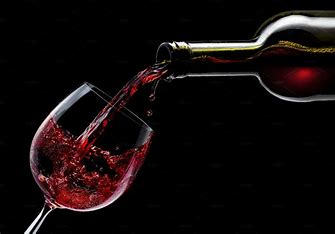

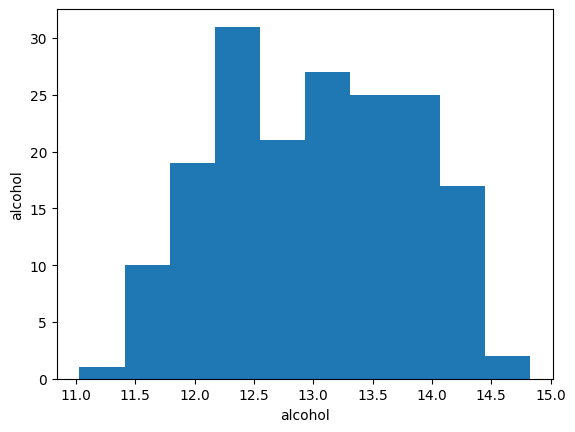

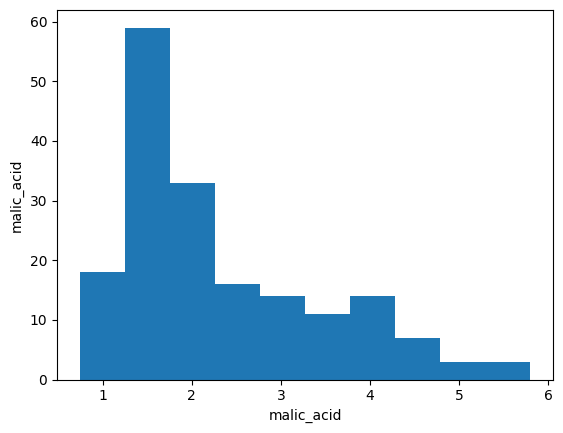

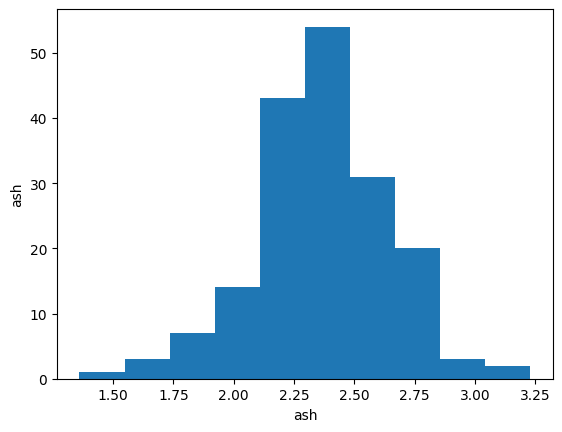

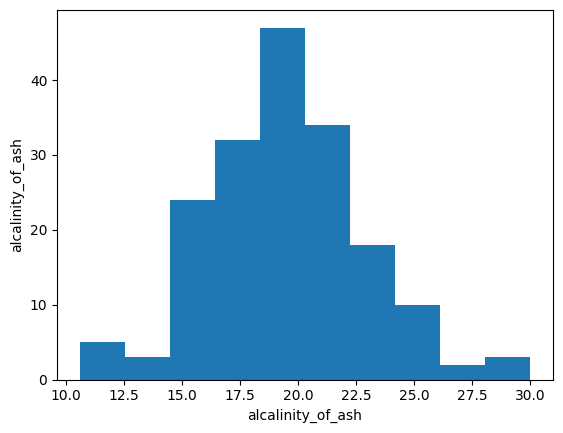

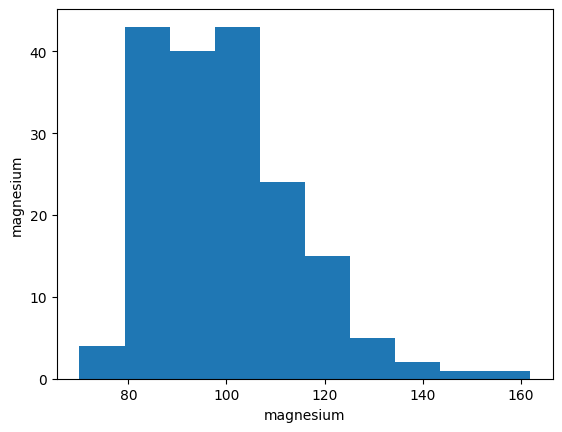

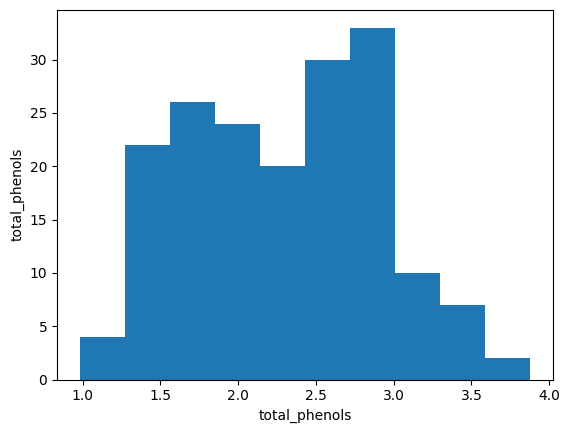

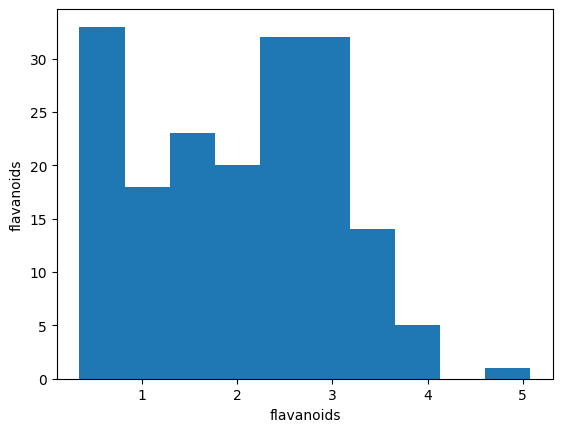

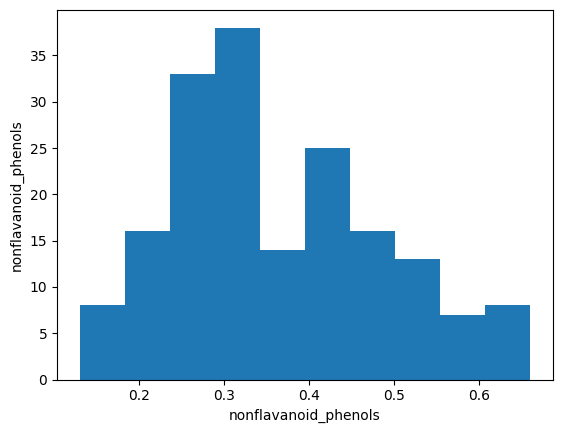

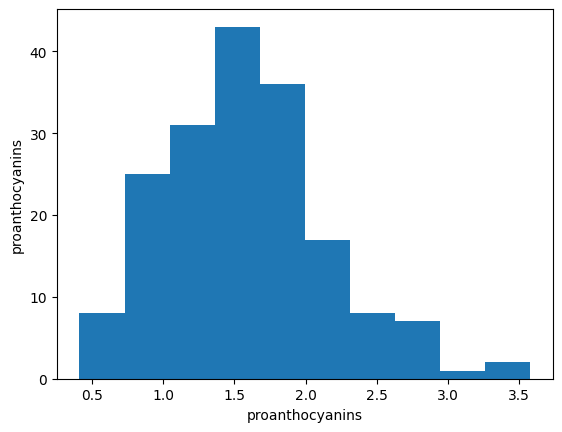

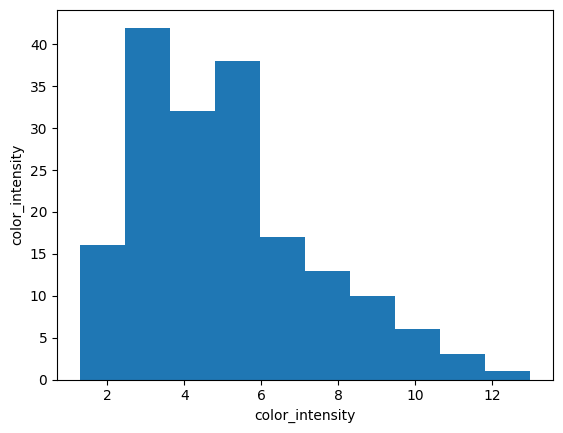

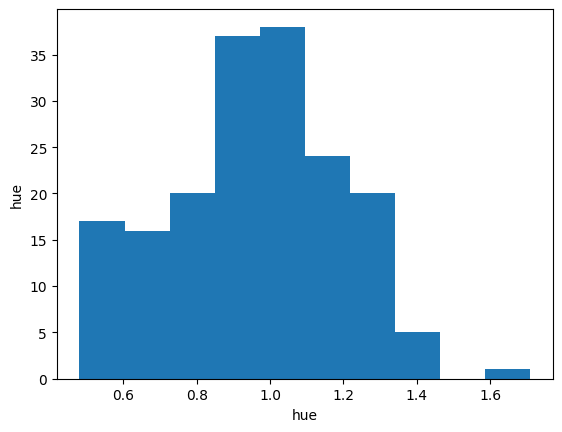

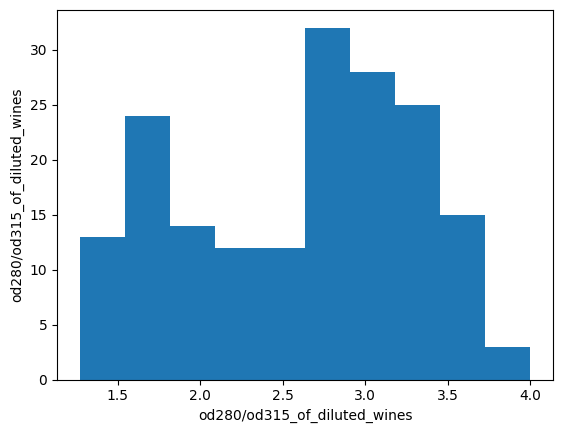

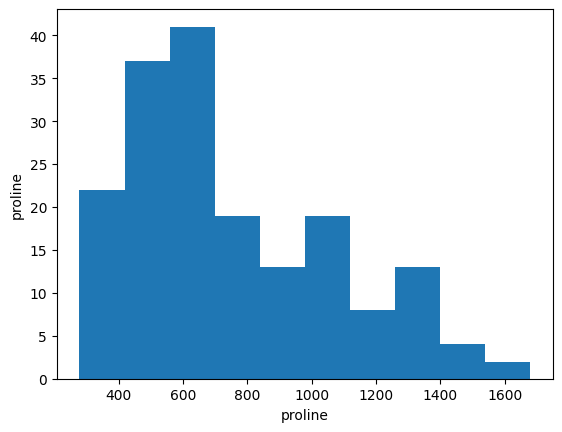

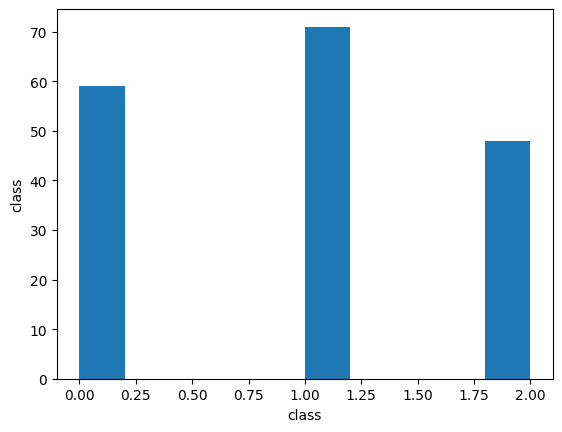

In [10]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# visualization

for i in df.columns:
    plt.hist(df[i])
    plt.ylabel(i)
    plt.xlabel(i) # Corrected typo: 'lable' to 'xlabel'
    plt.show()

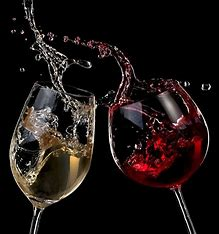

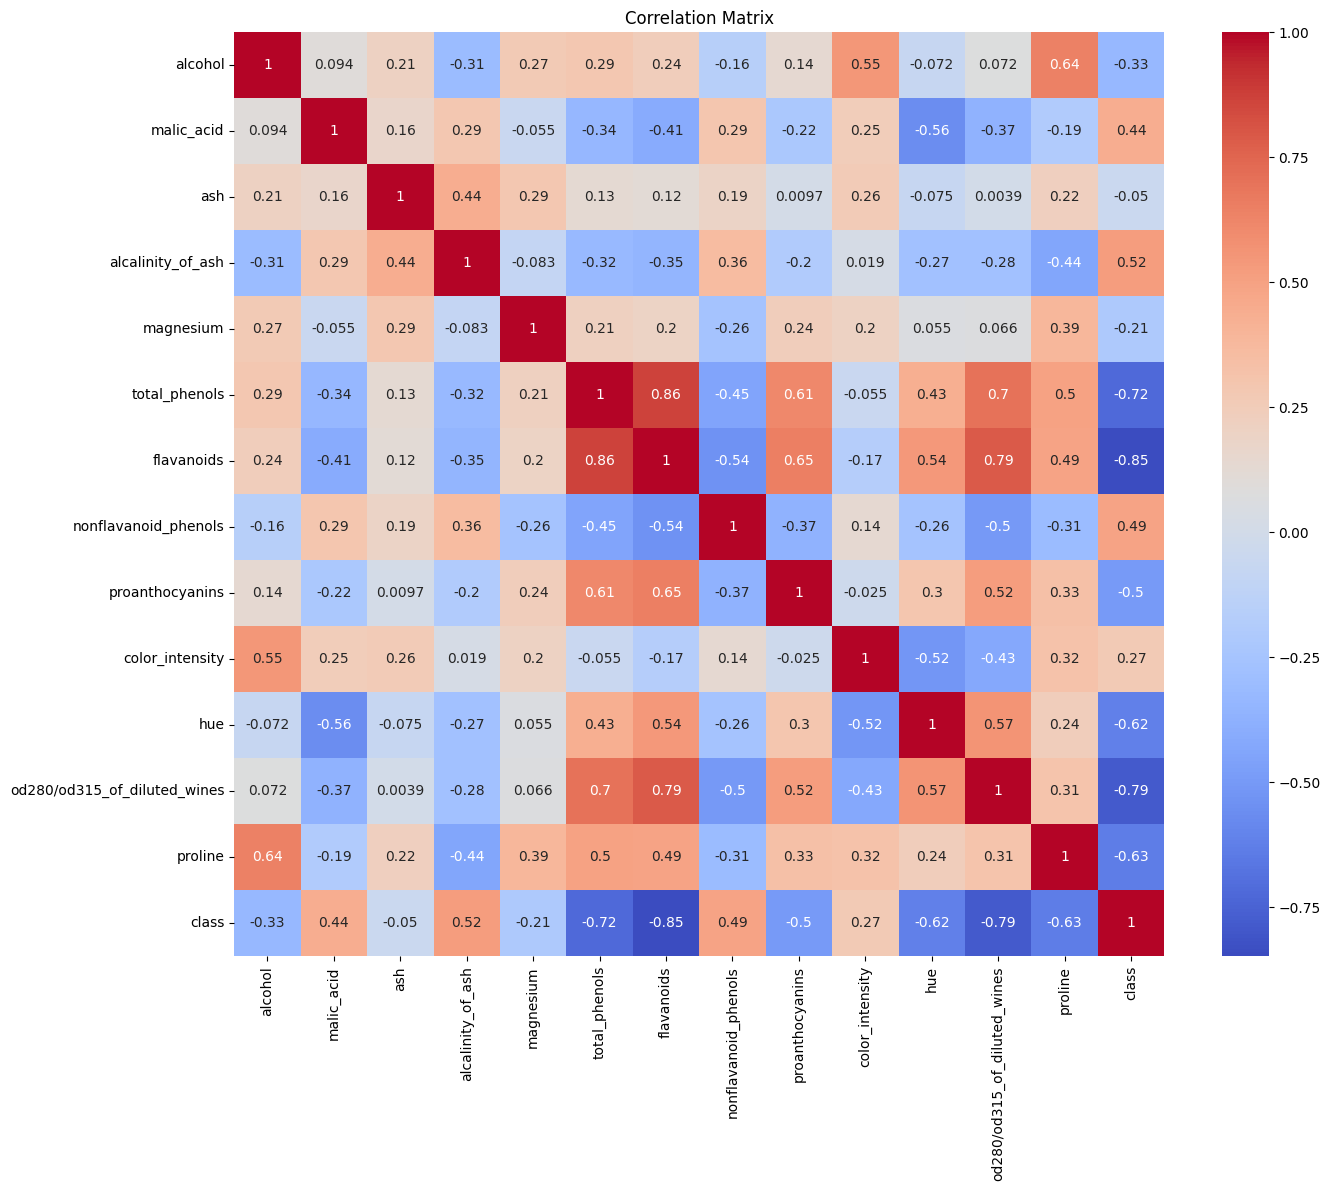

In [15]:
import seaborn as sns  # Import seaborn for heatmap
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# bivariate

corr_matrix = df.corr()
plt.figure(figsize=(15, 12))  # Set figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Machine Learning
from sklearn.naive_bayes import GaussianNB # import the GaussianNB class
from sklearn.metrics import classification_report, confusion_matrix # import classification_report and confusion_matrix

# Gaussian Naive Bayes - Probability Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred1 = nb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


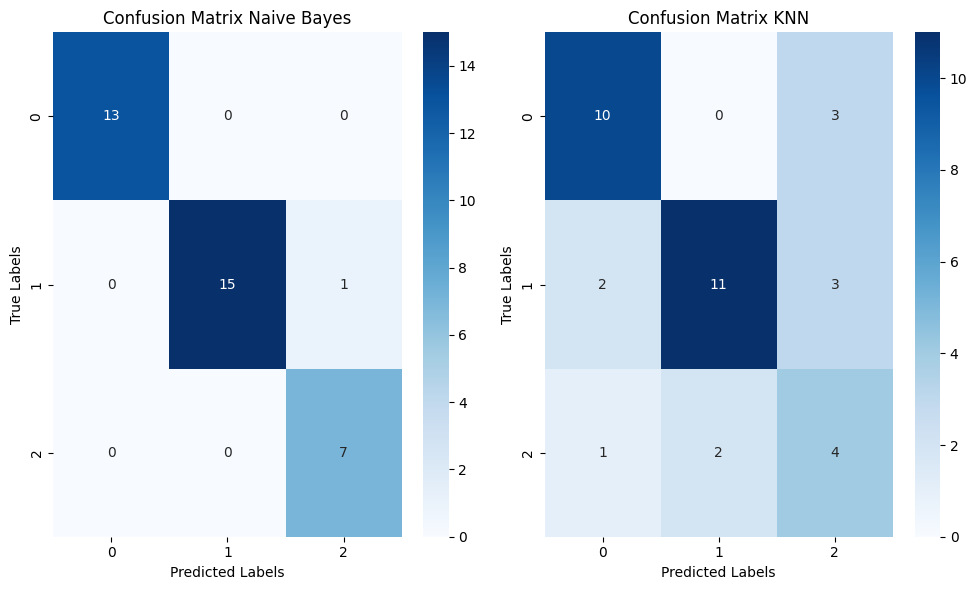

In [ ]:
# confusion matrix with heatmap for both the models
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [20]:
# K-Nearest Neighbour - Distance Model
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


In [21]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Machine Learning

# Split the data into X(features) and y(target)
X = df.drop('class', axis=1)
y = df['class']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)
